In [2]:
import pandas as pd
import numpy as np
import numpy.random as rd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv", index_col=0)
df = pd.DataFrame(df)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
df.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df["Genre"].replace({"Male" : 1, "Female" : 0}, inplace=True)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [5]:
df1 = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df1

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

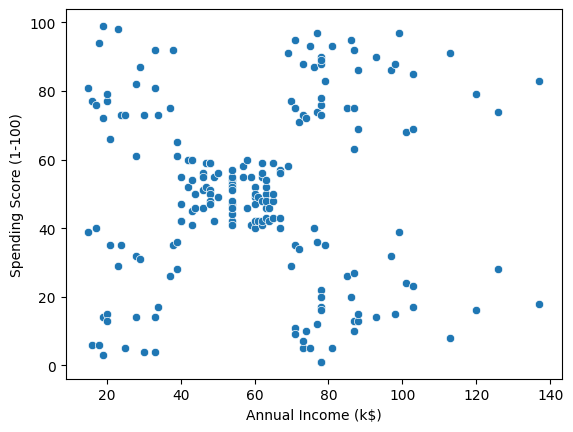

In [6]:
sns.scatterplot(df1, x="Annual Income (k$)", y="Spending Score (1-100)")

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0, init="k-means++").fit(df1)
colors = model.labels_
c = model.cluster_centers_
xc = [itm[0] for itm in c]
yc = [itm[1] for itm in c]
xc, yc

([87.00000000000001, 44.15447154471549, 86.53846153846155],
 [18.631578947368403, 49.829268292682926, 82.12820512820511])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

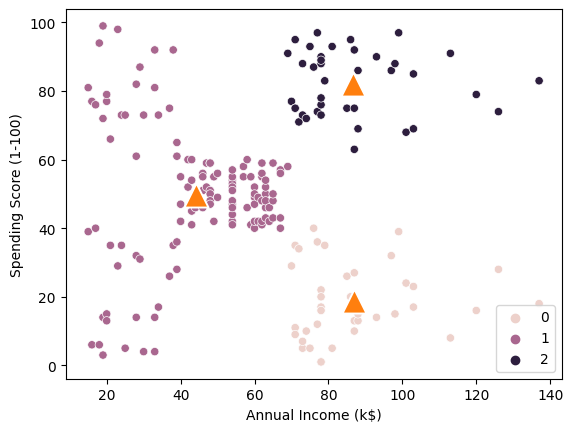

In [8]:
sns.scatterplot(data=df1, x="Annual Income (k$)", y="Spending Score (1-100)", hue=colors)
sns.scatterplot(x=xc, y = yc, marker="^", s = 300)

In [9]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, random_state=0, init="k-means++").fit(df1)
    wcss.append(model.inertia_)
wcss

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544,
 21830.041978049434,
 20736.67993892412]

[Text(0.5, 0, 'Clusters'), Text(0, 0.5, 'WCSS')]

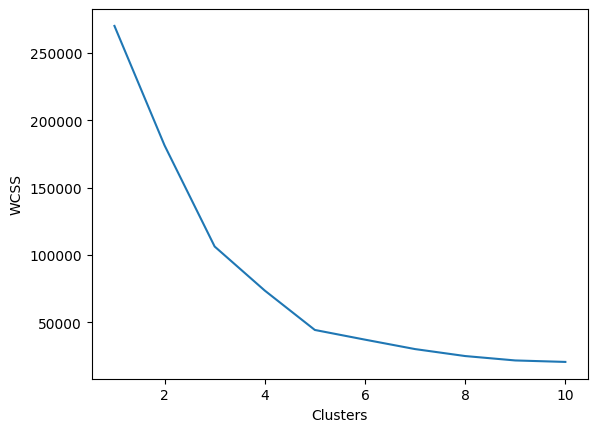

In [10]:
sns.lineplot(x = [itm for itm in range(1, 11)], y = wcss).set(xlabel="Clusters", ylabel="WCSS")


In [11]:
model = KMeans(n_clusters=5, random_state=0, init="k-means++").fit(df1)
colors = model.labels_
c = model.cluster_centers_
xc = [itm[0] for itm in c]
yc = [itm[1] for itm in c]
xc, yc


([88.20000000000002,
  55.29629629629632,
  86.53846153846155,
  25.727272727272755,
  26.304347826086982],
 [17.1142857142857,
  49.51851851851852,
  82.12820512820511,
  79.36363636363636,
  20.913043478260867])

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

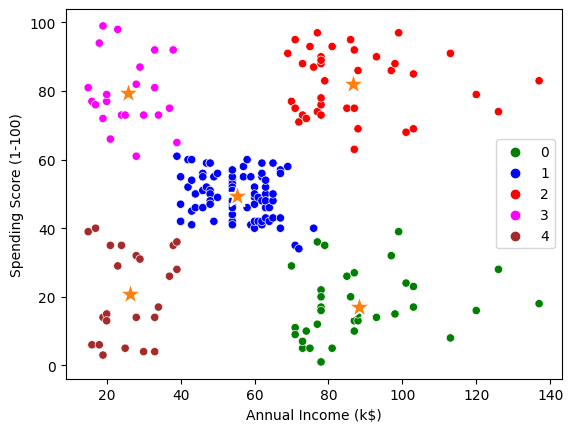

In [12]:
sns.scatterplot(data=df1, x="Annual Income (k$)", y="Spending Score (1-100)", hue=colors, palette=["green", "blue", "red", "magenta", "brown"])
sns.scatterplot(x=xc, y=yc, marker='*' ,s=300)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [60.0, 60.0, 88.125, 88.125],
  [17.5, 17.5, 74.0625, 74.0625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [45.78125, 45.78125, 161.875, 161.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [237.5, 237.5, 297.5, 297.5],
  [335.0, 33

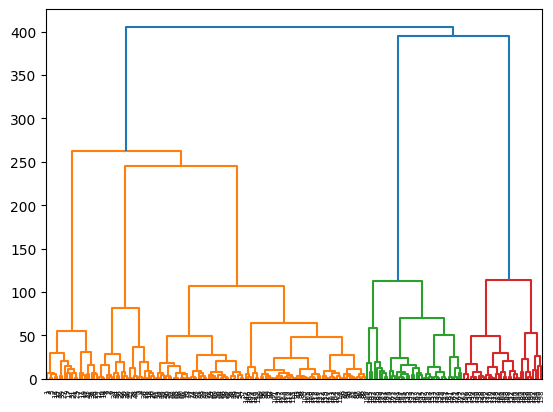

In [13]:
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df1, method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5).fit(df1)


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

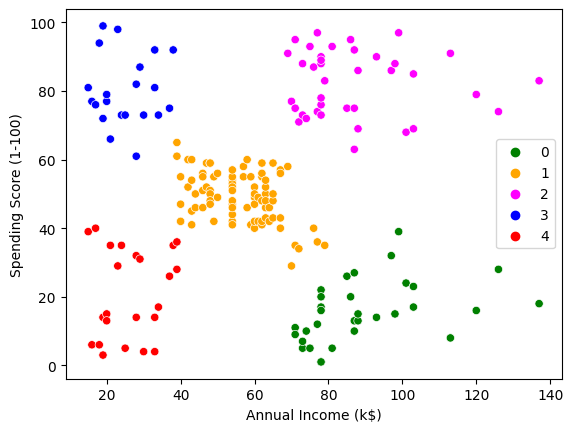

In [15]:
sns.scatterplot(data=df1, x="Annual Income (k$)", y="Spending Score (1-100)", hue=clustering.labels_,palette=['green','orange','magenta','blue','red'])
# sns.scatterplot(x=x, y=y, marker='*' ,s=300)